<a href="https://colab.research.google.com/github/AdityaVarmaUddaraju/mnist_pytorch/blob/master/pytorch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [2]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2019-04-18 17:45:10--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz.1’

mnist.pkl.gz.1      100%[===================>]  15.42M  22.5MB/s    in 0.7s    

2019-04-18 17:45:11 (22.5 MB/s) - ‘mnist.pkl.gz.1’ saved [16168813/16168813]



In [0]:
path = Path('./')

In [4]:
path.ls()

[PosixPath('.config'),
 PosixPath('mnist.pkl.gz.1'),
 PosixPath('models'),
 PosixPath('mnist.pkl.gz'),
 PosixPath('sample_data')]

In [0]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

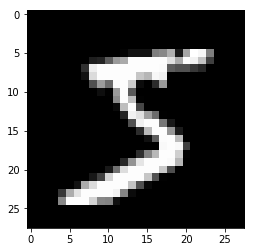

In [6]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [7]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [0]:
bs = 64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [0]:
class Mnist_NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(784, 500, bias=True)
    self.lin2 = nn.Linear(500, 100, bias=True)
    self.lin3 = nn.Linear(100, 50, bias=True)
    self.lin4 = nn.Linear(50, 10, bias=True)
    
  def forward(self, xb):
    x = self.lin1(xb)
    x = F.relu(x)
    x = self.lin2(x)
    x = F.relu(x)
    x = self.lin3(x)
    x = F.relu(x)
    return self.lin4(x)

In [0]:
model = Mnist_NN().cuda()

In [14]:
model

Mnist_NN(
  (lin1): Linear(in_features=784, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=50, bias=True)
  (lin4): Linear(in_features=50, out_features=10, bias=True)
)

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(x,y,lr):
  opt = optim.Adam(model.parameters(), lr)
  y_hat = model(x)
  loss = loss_func(y_hat, y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()

In [0]:
losses = [update(x,y,1e-3) for x,y in data.train_dl]

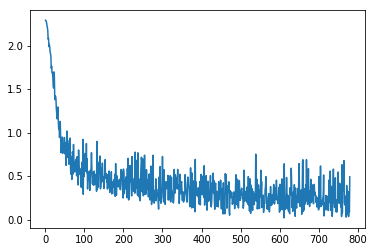

In [18]:
plt.plot(losses)

In [0]:
learn = Learner(data, Mnist_NN(), loss_func = loss_func, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


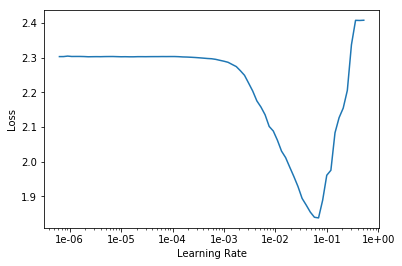

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.112800,0.097614,0.971700,00:04


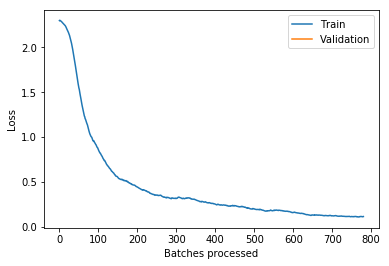

In [22]:
learn.recorder.plot_losses()

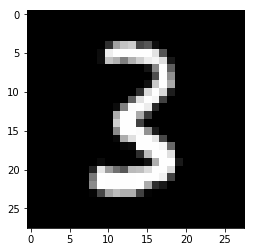

In [23]:
img = plt.imshow(x_valid[0].reshape((28,28)), cmap="gray")
img